In [1]:
import polars as pl
import numpy as np
import seaborn as sns

In [21]:
df = pl.read_parquet('../results/evaluation_model_matteo_random_1000.parquet')

In [ ]:
# THIS IS DONE WITH THE MATTEO/random DATASET => the same used to evaluate. 

# changing the dataset results in a lot less precision with identificataion:
# - more tokens as input
# - dropout
# - f1 higher, precision higher.

In [22]:
df.head()

text,sigmoid,softmax
str,struct[2],struct[2]
"""{""userAgent"":""[S3Console/0.4]""…","{0,0.883223}","{0,0.981223}"
"""{""userAgent"":""console.amazonaw…","{0,0.883223}","{0,0.981223}"
"""{""userAgent"":""console.amazonaw…","{0,0.883223}","{0,0.981223}"
"""{""userAgent"":""console.amazonaw…","{0,0.883223}","{0,0.981223}"
"""{""userAgent"":""console.amazonaw…","{0,0.713689}","{0,0.964017}"


In [23]:
df = df.unnest('sigmoid').rename({
    'max': 's_max',
    'argmax': 's_argmax'
}).unnest('softmax').rename({
     'max': 'max',
    'argmax': 'argmax' 
})

<Axes: >

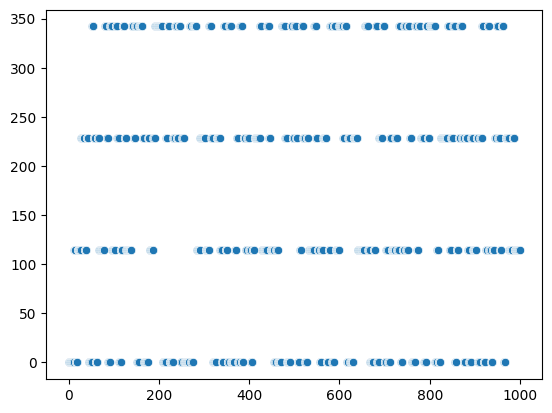

In [24]:
sns.scatterplot(df['s_argmax'])

<Axes: >

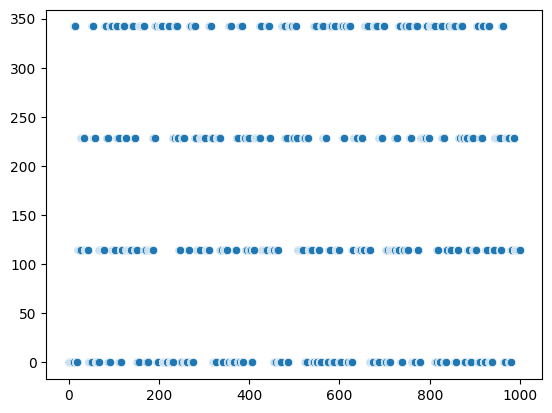

In [25]:
sns.scatterplot(df['argmax'])

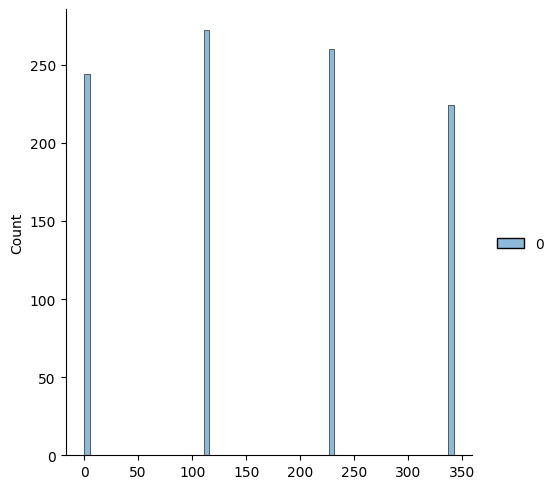

In [48]:
sns.displot(
    df.select(pl.col('s_argmax')),
    binwidth=5,
)

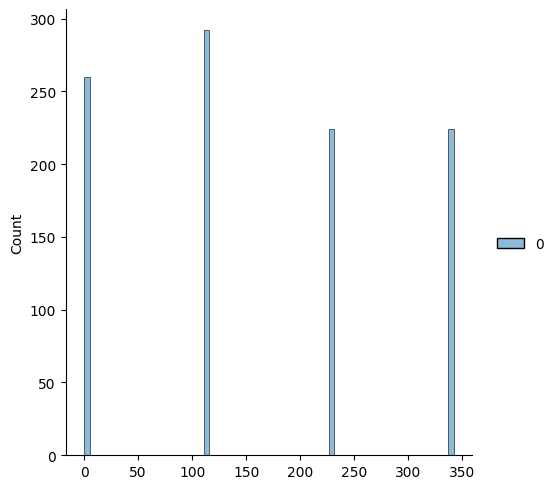

In [49]:
sns.displot(
    df.select(pl.col('argmax')),
    binwidth=5,
)

In [31]:
df.select(pl.col('s_argmax').value_counts()).unnest('s_argmax')

s_argmax,count
i64,u32
342,224
228,260
114,272
0,244


In [40]:
df.select(pl.col('argmax').value_counts()).unnest('argmax')

argmax,count
i64,u32
342,224
114,292
0,260
228,224
